# Project 2: HDB price predictor for young families
### Cleaning and EDA

In [30]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [31]:
# Reading the csv file

hdb = pd.read_csv('../datasets/train.csv')

/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_33821/2471406726.py:3: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb = pd.read_csv('../datasets/train.csv')


In [32]:
# Early stage cleaning

hdb.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [33]:
hdb.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,...,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.000000,150634.00000,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,...,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,93047.887496,97.19763,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,...,395.172974,55.368190,0.113195,1.366268,103.839106,508.533220,210.146428,0.031879,1.365986,103.839340
std,53679.906247,24.40304,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,...,234.760931,17.903918,0.316832,0.042669,0.072637,309.066265,20.010489,0.175677,0.042599,0.072630
min,1.000000,31.00000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,1.000000,3.000000,2.000000,...,45.668324,20.000000,0.000000,1.274962,103.687724,38.913475,188.000000,0.000000,1.276029,103.687207
25%,46469.250000,75.00000,1984.000000,3.470000e+05,2014.000000,4.000000,5.000000,4.000000,6.000000,5.000000,...,227.083163,44.000000,0.000000,1.337289,103.773754,290.285883,188.000000,0.000000,1.337545,103.776008
50%,93077.500000,95.00000,1992.000000,4.200000e+05,2017.000000,7.000000,8.000000,7.000000,9.000000,8.000000,...,348.876691,54.000000,0.000000,1.364639,103.844210,447.377670,208.000000,0.000000,1.366132,103.842719
75%,139574.750000,112.00000,2001.000000,5.200000e+05,2019.000000,9.000000,11.000000,10.000000,12.000000,11.000000,...,502.179385,67.000000,0.000000,1.393910,103.898773,644.284099,224.000000,0.000000,1.391781,103.899872
max,185966.000000,280.00000,2019.000000,1.258000e+06,2021.000000,12.000000,50.000000,49.000000,51.000000,50.000000,...,3305.841039,110.000000,1.000000,1.456667,103.962919,3638.977233,260.000000,1.000000,1.453280,103.961105


In [34]:
hdb.shape

(150634, 78)

In [35]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [36]:
missing_values = hdb.isnull()

missing_count = hdb.isnull().sum()

any_missing = hdb.isnull().any().any()

missing_percentage = hdb.isnull().mean() * 100
print(missing_percentage)

id                   0.0
Tranc_YearMonth      0.0
town                 0.0
flat_type            0.0
block                0.0
                    ... 
sec_sch_name         0.0
cutoff_point         0.0
affiliation          0.0
sec_sch_latitude     0.0
sec_sch_longitude    0.0
Length: 78, dtype: float64


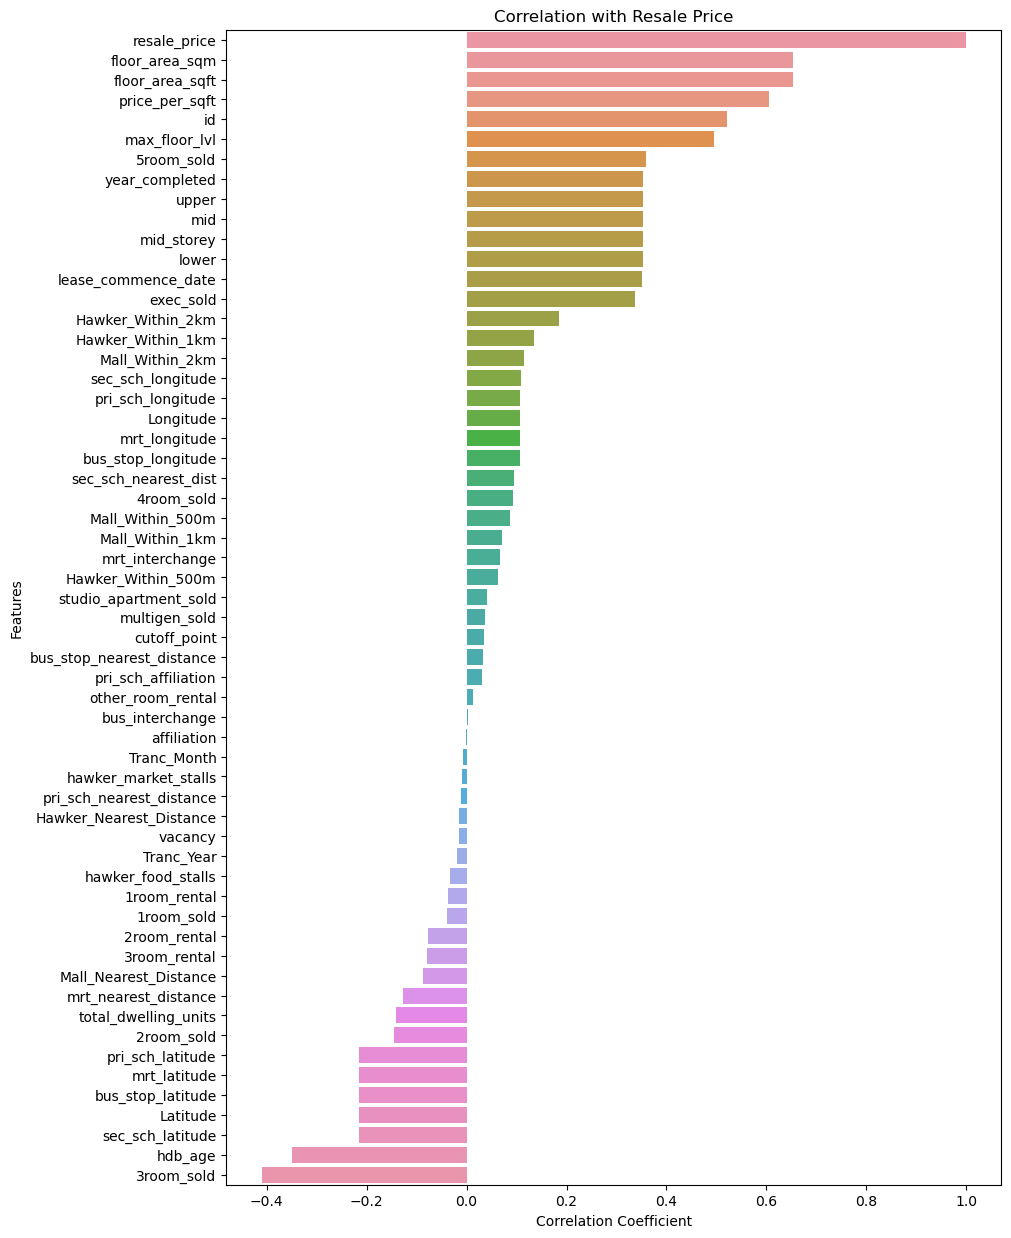

resale_price                 1.000000
floor_area_sqm               0.654120
floor_area_sqft              0.654120
price_per_sqft               0.606288
id                           0.521504
max_floor_lvl                0.495650
5room_sold                   0.359434
year_completed               0.353698
upper                        0.353552
mid                          0.353213
mid_storey                   0.353213
lower                        0.352466
lease_commence_date          0.350337
exec_sold                    0.337500
Hawker_Within_2km            0.185607
Hawker_Within_1km            0.134415
Mall_Within_2km              0.115703
sec_sch_longitude            0.108911
pri_sch_longitude            0.106681
Longitude                    0.106596
mrt_longitude                0.106506
bus_stop_longitude           0.106394
sec_sch_nearest_dist         0.095339
4room_sold                   0.092600
Mall_Within_500m             0.086955
Mall_Within_1km              0.069929
mrt_intercha

In [37]:
# Calculate correlations
# Compute the correlation matrix, including only numeric columns
corr_matrix = hdb.select_dtypes(include=[np.number]).corr()
# Focus on correlations with the target variable 'resale_price'
target_corr = corr_matrix['resale_price'].sort_values(ascending=False)
# Plot the correlations with the target variable
plt.figure(figsize=(10, 15))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Correlation with Resale Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
target_corr

'In recent years, the number of unique first-timer family applicants has increased significantly from over 19,000 in 2018 to about 34,000 in 2021' [(HDB, 2023)](https://www.hdb.gov.sg/cs/infoweb/about-us/news-and-publications/publications/hdbspeaks/Helping-first-time-home-buyers-secure-a-BTO-flat#:~:text=In%20recent%20years%2C%20we%20have,to%20about%2034%2C000%20in%202021.)

As a team of data scientists with PropNex, our goal is to create a value-added product that our agents can bring to their clients - a predictive model for first-timer family applicants to identify HDB resale values, based on our clients' family-specific needs.

The key columns we want to take a look at are: 
* 'Tranc_YearMonth' 
* 'town'
* 'floor_area_sqm'
* 'resale_price'
* 'mid_storey'
* 'flat_type'
* 'hdb_age'
* 'Latitude'
* 'Longitude'
* 'Mall_Nearest_Distance'
* 'Hawker_Nearest_Distance'
* 'mrt_nearest_distance'
* 'bus_interchange'
* 'bus_stop_nearest_distance'
* 'pri_sch_name'
* 'pri_sch_latitude'
* 'pri_sch_longitude'.

The features selected are a mix of some that are highly correlated with resale value, and others that are more specific to young families' needs. We will also be building a feature to measure distance to the city centre 'dist_to_cbd_km'

In [38]:
# As the predictive model is targeted at young families, the columns (features) selected should align to the objective.

hdb_fam = hdb[['Tranc_YearMonth', 'town','floor_area_sqm', 'resale_price', 'mid_storey', 'flat_type', 'hdb_age', 'Latitude', 'Longitude', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_interchange', 'bus_stop_nearest_distance', 'pri_sch_name', 'pri_sch_latitude', 'pri_sch_longitude']]

In [39]:
# Early stage data cleaning of new dataframe

hdb_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Tranc_YearMonth            150634 non-null  object 
 1   town                       150634 non-null  object 
 2   floor_area_sqm             150634 non-null  float64
 3   resale_price               150634 non-null  float64
 4   mid_storey                 150634 non-null  int64  
 5   flat_type                  150634 non-null  object 
 6   hdb_age                    150634 non-null  int64  
 7   Latitude                   150634 non-null  float64
 8   Longitude                  150634 non-null  float64
 9   Mall_Nearest_Distance      149805 non-null  float64
 10  Hawker_Nearest_Distance    150634 non-null  float64
 11  mrt_nearest_distance       150634 non-null  float64
 12  bus_interchange            150634 non-null  int64  
 13  bus_stop_nearest_distance  15

In [40]:
# Convert all column names to lower case to maintain consistency with previous steps
hdb_fam.columns = hdb_fam.columns.str.lower()

In [41]:
# Renaming columns
hdb_fam = hdb_fam.rename(columns={'tranc_yearmonth': 'transact_date',
                                    'mid_storey': 'storey',
                                    'hdb_age': 'age',
                                    'latitude': 'lat',
                                    'longitude': 'lon',
                                    'mall_nearest_distance': 'mall_dist',
                                    'hawker_nearest_distance': 'hawker_dist',
                                    'mrt_nearest_distance': 'mrt_dist',
                                    'bus_stop_nearest_distance': 'bus_stop_dist',
                                    'pri_sch_name': 'pri_sch',
                                    'pri_sch_latitude': 'pri_sch_lat',
                                    'pri_sch_longitude': 'pri_sch_lon'})

In [42]:
# Converting the transaction date column into an integer so that correlation can be plotted

hdb_fam['transact_date'] = hdb_fam['transact_date'].str.replace('-', '')
hdb_fam['transact_date'] = hdb_fam['transact_date'].astype(int)
hdb_fam['transact_date'].dtypes

dtype('int64')

In [43]:
hdb_fam['mall_dist'].isnull().sum() # 829 null values
hdb_fam.shape # 150634 values

# Drop null values as it takes up a low-significant proportion of the data
hdb_fam.dropna(subset=['mall_dist'], inplace=True)
hdb_fam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149805 entries, 0 to 150633
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transact_date    149805 non-null  int64  
 1   town             149805 non-null  object 
 2   floor_area_sqm   149805 non-null  float64
 3   resale_price     149805 non-null  float64
 4   storey           149805 non-null  int64  
 5   flat_type        149805 non-null  object 
 6   age              149805 non-null  int64  
 7   lat              149805 non-null  float64
 8   lon              149805 non-null  float64
 9   mall_dist        149805 non-null  float64
 10  hawker_dist      149805 non-null  float64
 11  mrt_dist         149805 non-null  float64
 12  bus_interchange  149805 non-null  int64  
 13  bus_stop_dist    149805 non-null  float64
 14  pri_sch          149805 non-null  object 
 15  pri_sch_lat      149805 non-null  float64
 16  pri_sch_lon      149805 non-null  float64
d

In [44]:
# Finding out the date range of this final data set

print(f"Earliest transaction date within this data set is {hdb_fam['transact_date'].min()}")
print(f"Latest transaction date within this data set is {hdb_fam['transact_date'].max()}")

Earliest transaction date within this data set is 201203
Latest transaction date within this data set is 202104


# EDA

<Axes: >

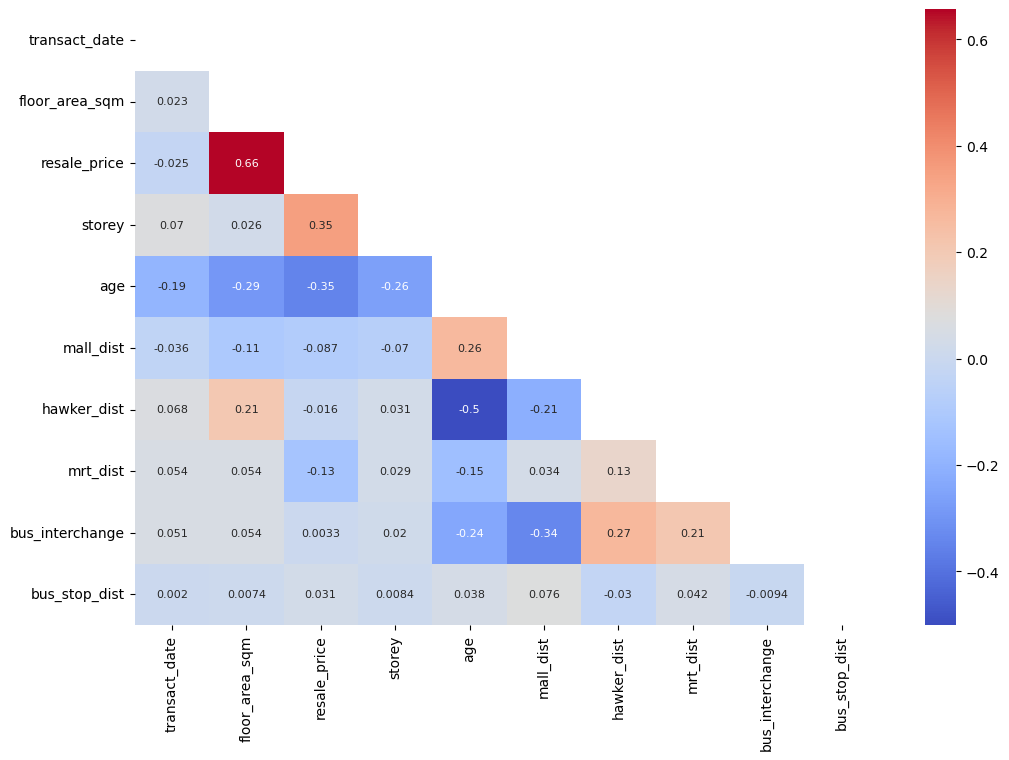

In [45]:
# Filtering out all non numerical columns
hdb_fam_corr = hdb_fam.drop(columns=['town', 'pri_sch', 'flat_type', 'lat', 'lon', 'pri_sch', 'pri_sch_lat', 'pri_sch_lon'])

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Creating mask to hide upper triangular part
mask = np.triu(np.ones_like(hdb_fam_corr.corr()))

# Plotting heatmap
sns.heatmap(hdb_fam_corr.corr(), annot=True, cmap='coolwarm', annot_kws={"size":8}, mask=mask)

Top 5 numerical variables that have correlations to resale_price:
1. floor_area_sqm (positive)
2. storey (positive)
3. age (negative)
4. mrt_dist (negative)
5. mall_dist (negative)

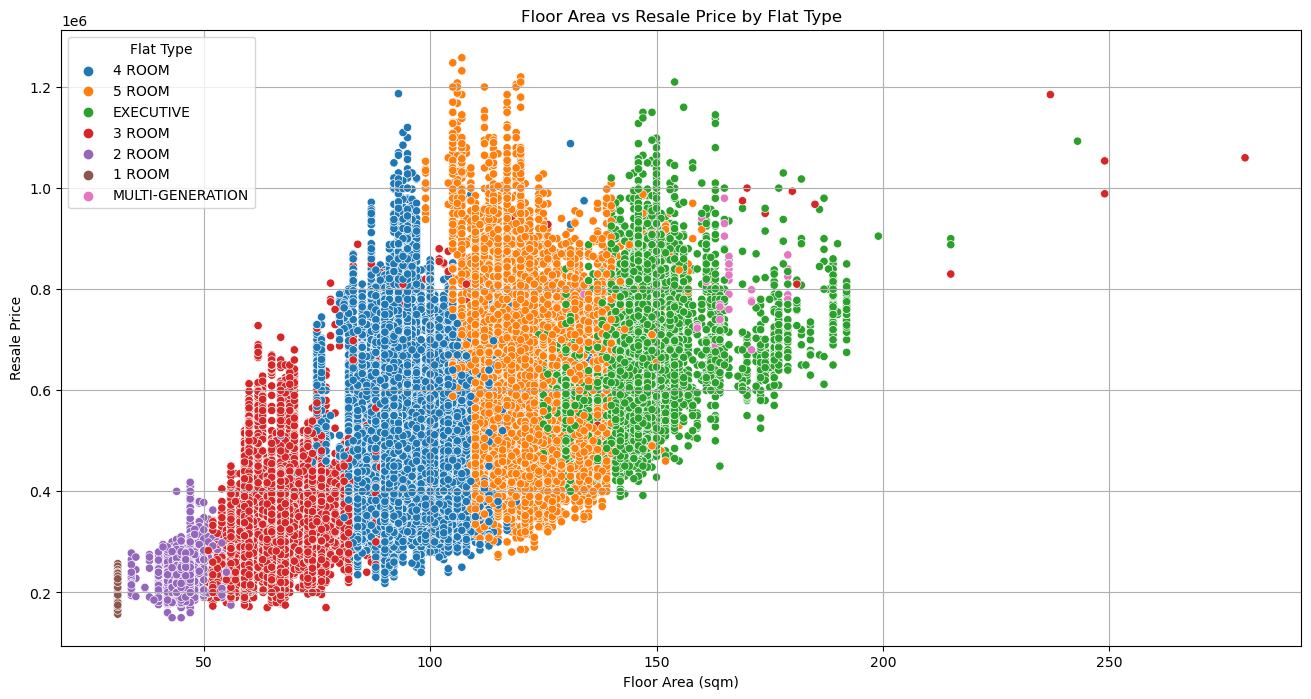

In [46]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='flat_type', data=hdb_fam)
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.title('Floor Area vs Resale Price by Flat Type')
plt.grid(True)
plt.legend(title='Flat Type')
plt.show()

In [47]:
anomaly = hdb_fam[(hdb_fam['flat_type'] == '3 ROOM') & (hdb_fam['floor_area_sqm'] > 150)]
anomaly[['transact_date', 'town', 'floor_area_sqm', 'resale_price', 'storey', 'age']].sort_values('resale_price')

,transact_date,town,floor_area_sqm,resale_price,storey,age
145478,201705,KALLANG/WHAMPOA,181.0,810000.0,2,49
17097,201706,KALLANG/WHAMPOA,215.0,830000.0,2,49
106968,201806,KALLANG/WHAMPOA,174.0,950000.0,2,49
101839,201805,KALLANG/WHAMPOA,185.0,968000.0,2,49
59168,201907,KALLANG/WHAMPOA,169.0,975000.0,2,49
5341,201208,KALLANG/WHAMPOA,249.0,988888.0,2,49
62343,201311,KALLANG/WHAMPOA,180.0,993888.0,2,49
148581,202009,KALLANG/WHAMPOA,170.0,1000000.0,2,49
79886,201712,KALLANG/WHAMPOA,249.0,1053888.0,2,49
371,201503,KALLANG/WHAMPOA,280.0,1060000.0,2,49


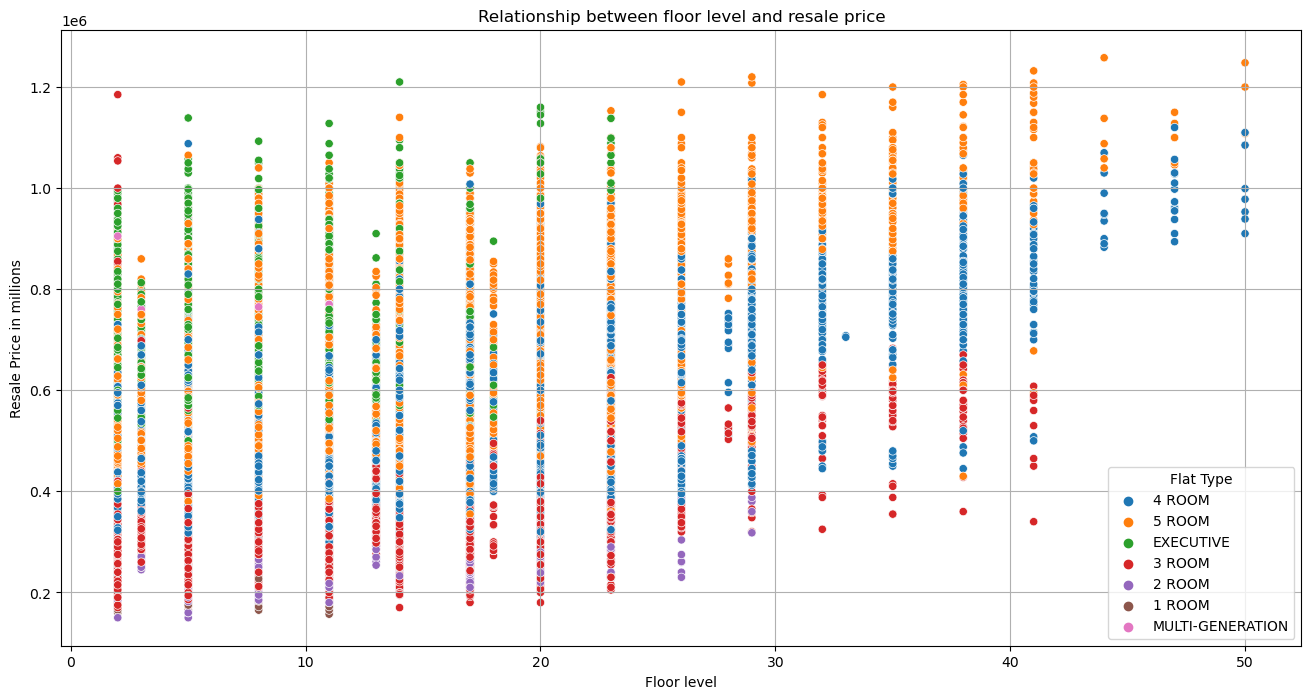

In [48]:
# Scatter plot of floor level and resale price
plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'storey', y= 'resale_price', data = hdb_fam, hue='flat_type')
plt.xlabel('Floor level')
plt.ylabel('Resale Price in millions')
plt.legend(title='Flat Type')
plt.title('Relationship between floor level and resale price')
plt.grid(True)

Text(0.5, 1.0, 'Relationship between HDB age and resale price with best fit line')

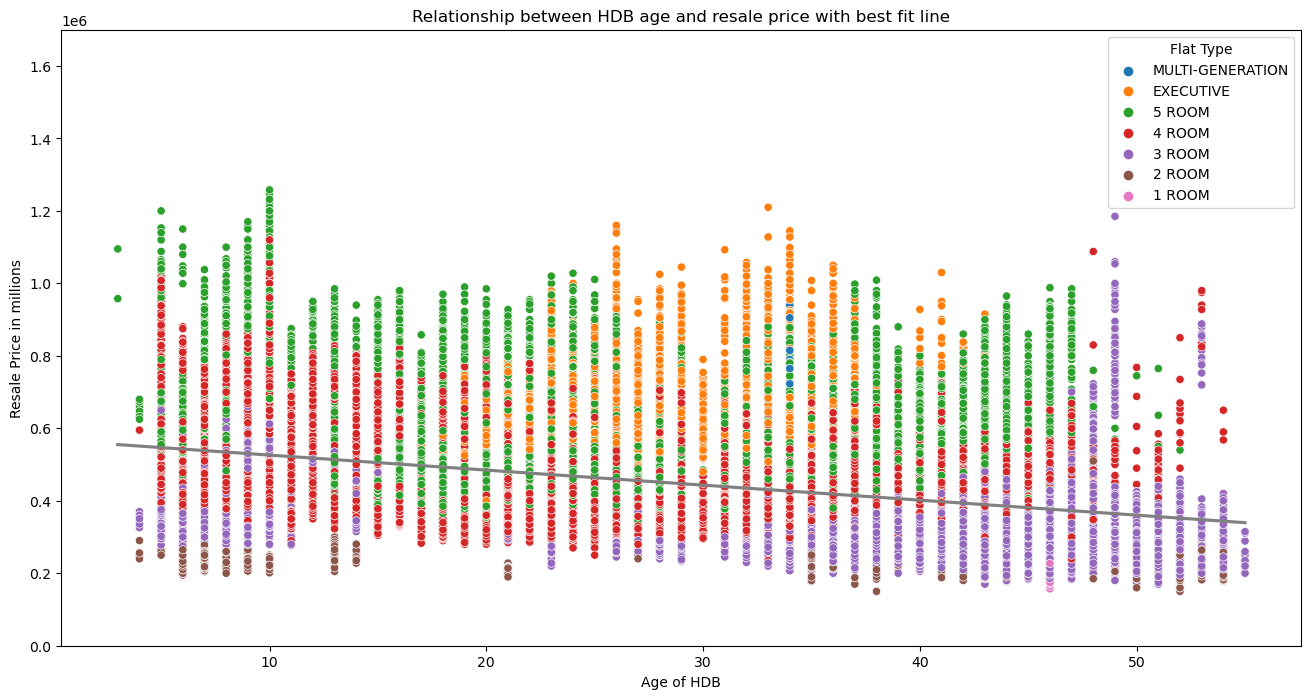

In [49]:
# Define the order of flat types for the legend
flat_type_order = ['MULTI-GENERATION', 'EXECUTIVE', '5 ROOM', '4 ROOM', '3 ROOM', '2 ROOM', '1 ROOM']

# Scatter plot of hdb age and resale price with best fit line
plt.figure(figsize=(16, 8))
sns.scatterplot(data=hdb_fam, x='age', y='resale_price', hue='flat_type', hue_order=flat_type_order)
plt.ylim(0,1700000)
sns.regplot(data=hdb_fam, x='age', y='resale_price', scatter=False, color='gray', ci=None)
plt.xlabel('Age of HDB')
plt.ylabel('Resale Price in millions')
plt.legend(title='Flat Type')
plt.title('Relationship between HDB age and resale price with best fit line')

Text(0.5, 1.0, 'Relationship between distance to nearest MRT and resale price')

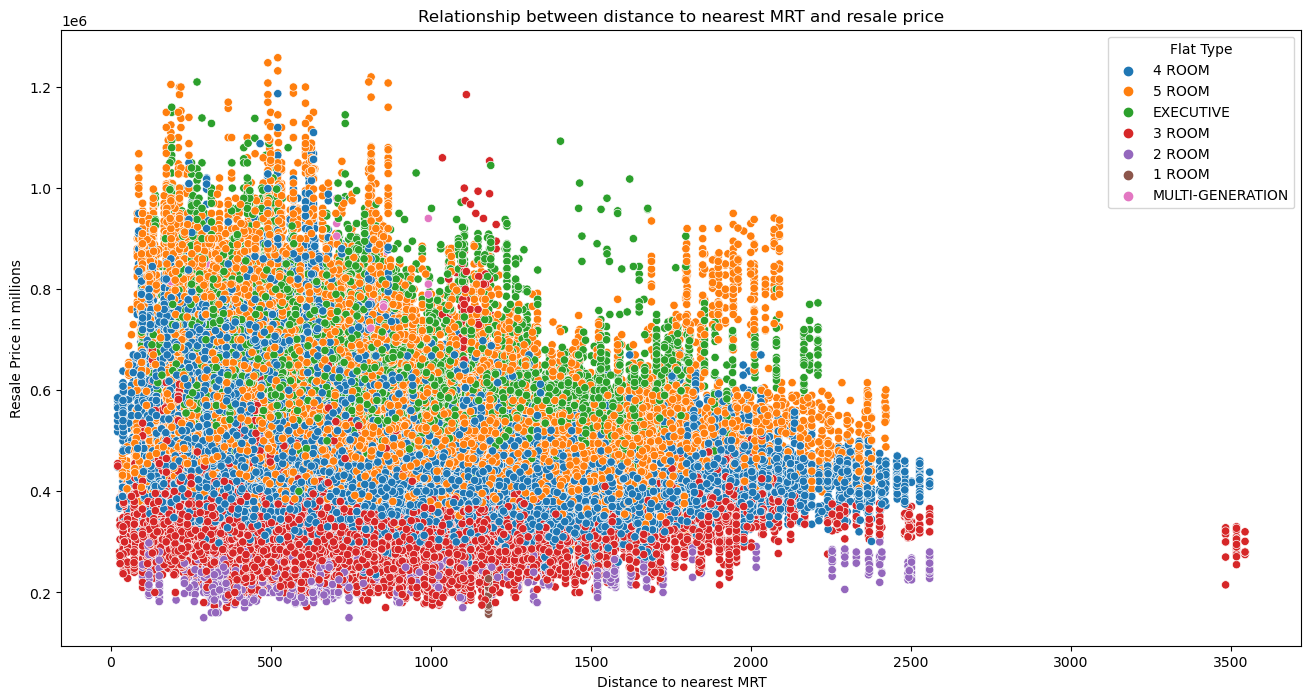

In [50]:
# Scatter plot of distance to nearest MRT and resale price
plt.figure(figsize=(16, 8))
sns.scatterplot(data = hdb_fam, x = 'mrt_dist', y = 'resale_price', hue='flat_type')
plt.xlabel('Distance to nearest MRT')
plt.ylabel('Resale Price in millions')
plt.legend(title='Flat Type')
plt.title('Relationship between distance to nearest MRT and resale price')

Text(0.5, 1.0, 'Relationship between distance to nearest mall and resale price')

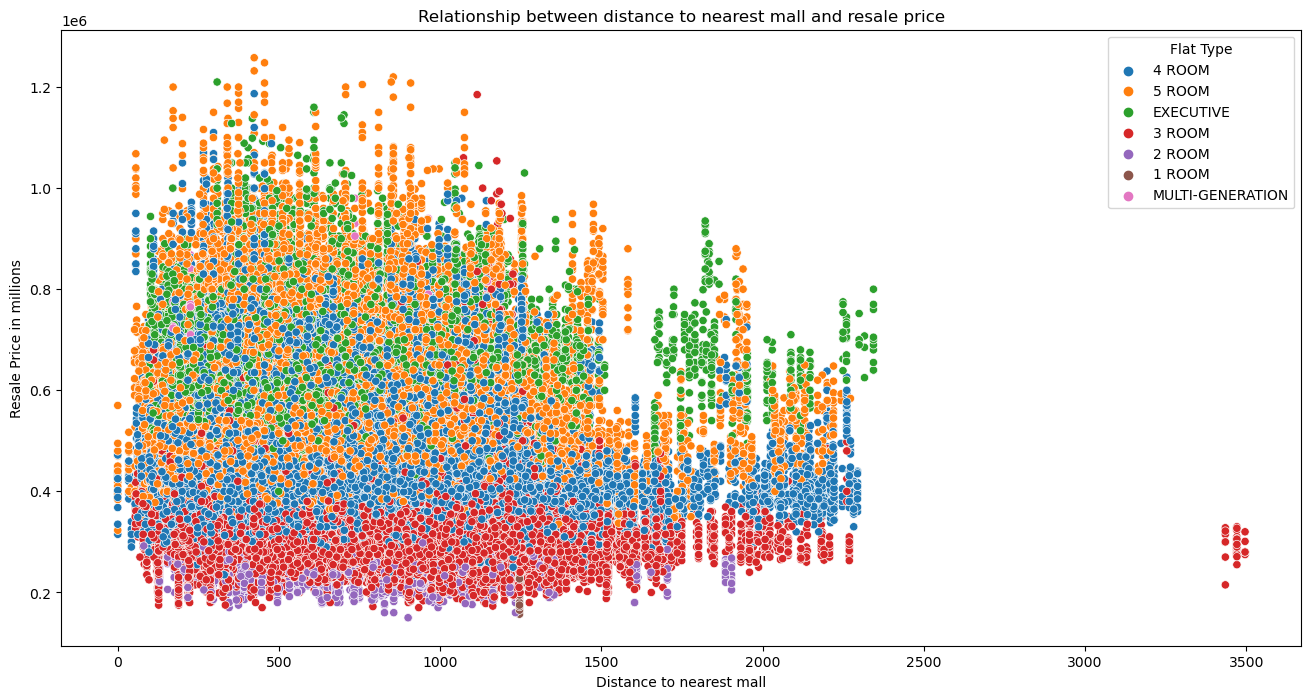

In [51]:
# Scatter plot of distance to nearest mall and resale price
plt.figure(figsize=(16, 8))
sns.scatterplot(data = hdb_fam, x = 'mall_dist', y = 'resale_price', hue='flat_type')
plt.xlabel('Distance to nearest mall')
plt.ylabel('Resale Price in millions')
plt.legend(title='Flat Type')
plt.title('Relationship between distance to nearest mall and resale price')

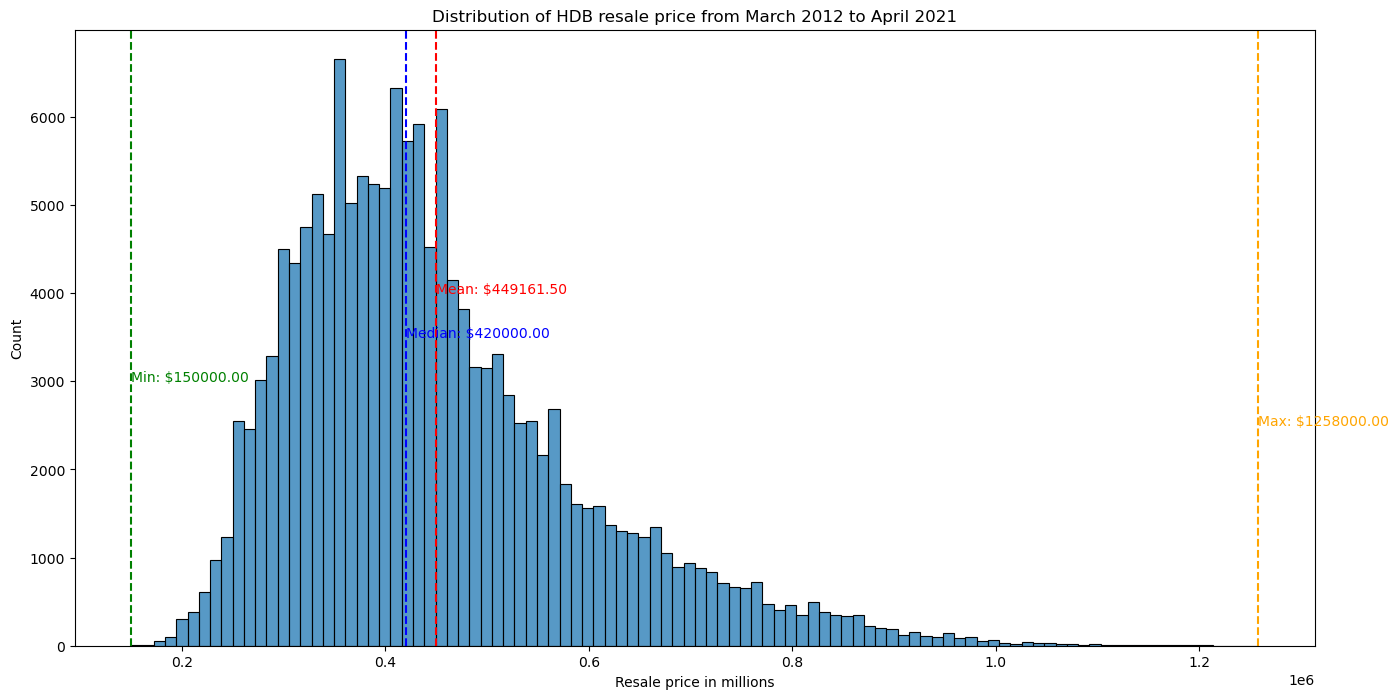

In [52]:
# Distribution of resale price
plt.figure(figsize=(16, 8))
sns.histplot(hdb['resale_price'], bins=100)
plt.xlabel('Resale price in millions')
plt.ylabel('Count')
plt.title('Distribution of HDB resale price from March 2012 to April 2021')

# Calculate mean, median, min, and max
mean_price = np.mean(hdb['resale_price'])
median_price = np.median(hdb['resale_price'])
min_price = np.min(hdb['resale_price'])
max_price = np.max(hdb['resale_price'])

# Add mean, median, min, and max to the plot with vertical lines
plt.axvline(mean_price, color='red', linestyle='--')
plt.axvline(median_price, color='blue', linestyle='--')
plt.axvline(min_price, color='green', linestyle='--')
plt.axvline(max_price, color='orange', linestyle='--')

# Add labels for mean, median, min, and max
plt.text(mean_price, 4000, f'Mean: ${mean_price:.2f}', fontsize=10, color='red')
plt.text(median_price, 3500, f'Median: ${median_price:.2f}', fontsize=10, color='blue')
plt.text(min_price, 3000, f'Min: ${min_price:.2f}', fontsize=10, color='green')
plt.text(max_price, 2500, f'Max: ${max_price:.2f}', fontsize=10, color='orange')

plt.show()


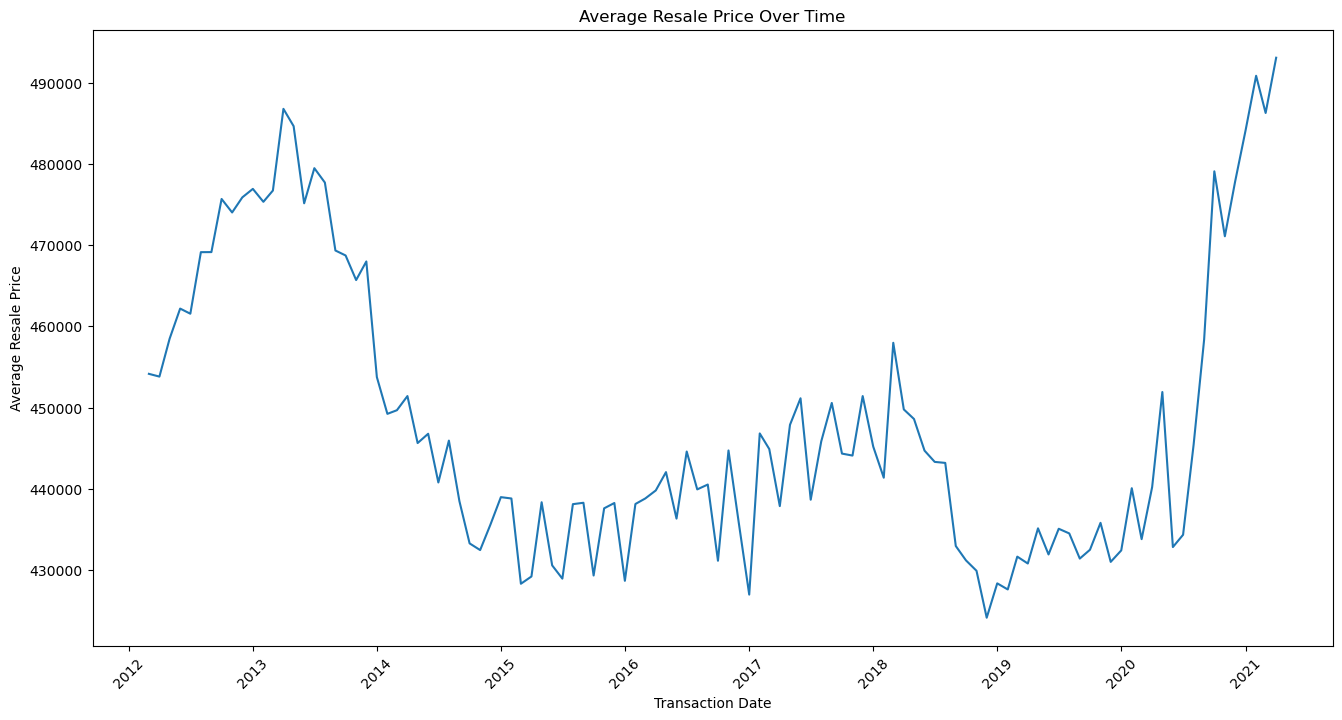

In [53]:
# Checking how resale prices have changed over time in the data set

# Change date format to datetime

hdb_fam['transact_date'] = pd.to_datetime(hdb['Tranc_YearMonth'], format=('%Y-%m'))

hdb_fam_sorted = hdb_fam.sort_values(by='transact_date')

# Adjusting figure size
plt.figure(figsize=(16, 8))

# Plotting
plt.plot(hdb_fam_sorted['transact_date'].unique(), 
         hdb_fam_sorted.groupby('transact_date')['resale_price'].mean())

# Adding labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price Over Time')

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

In [54]:
hdb_fam.columns

Index(['transact_date', 'town', 'floor_area_sqm', 'resale_price', 'storey',
       'flat_type', 'age', 'lat', 'lon', 'mall_dist', 'hawker_dist',
       'mrt_dist', 'bus_interchange', 'bus_stop_dist', 'pri_sch',
       'pri_sch_lat', 'pri_sch_lon'],
      dtype='object')

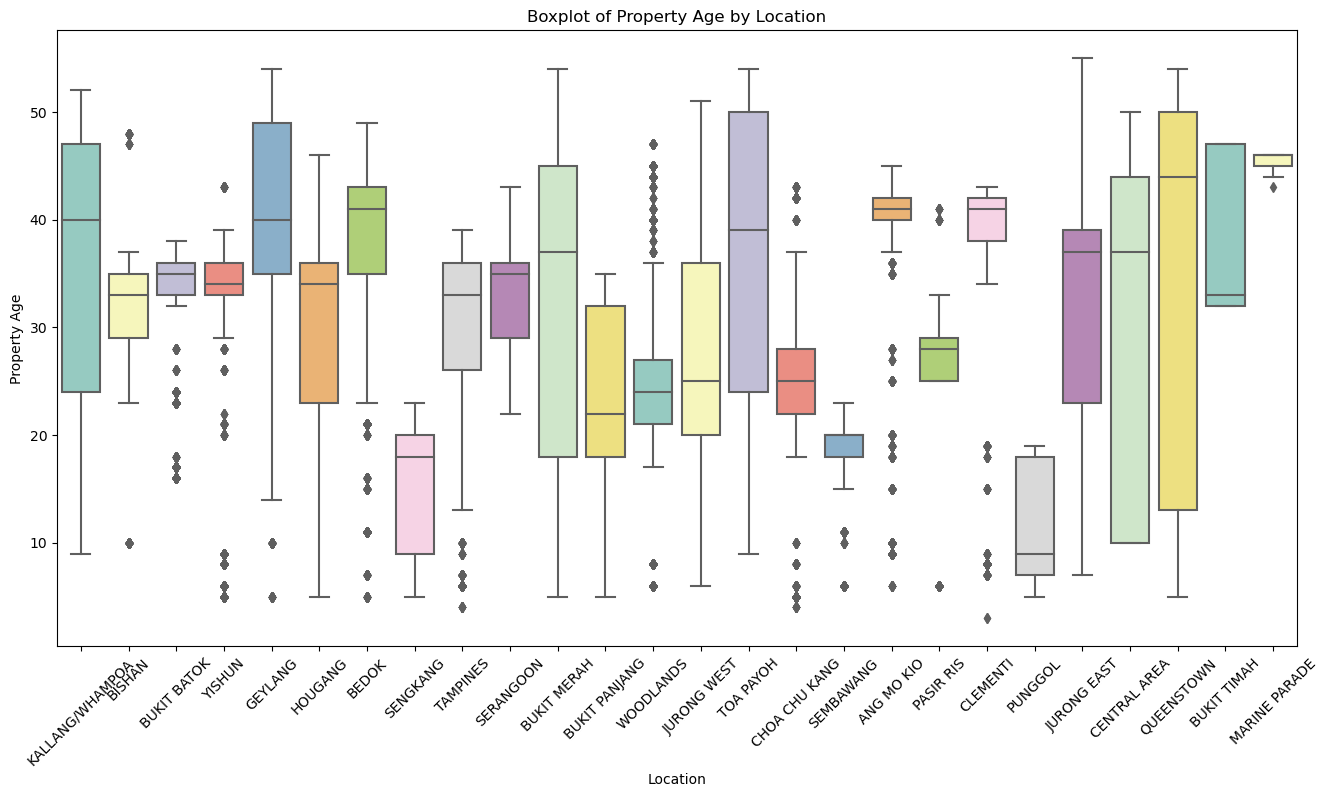

In [55]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='town', y='age', data=hdb_fam, palette='Set3')
plt.xlabel('Location')
plt.ylabel('Property Age')
plt.title('Boxplot of Property Age by Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

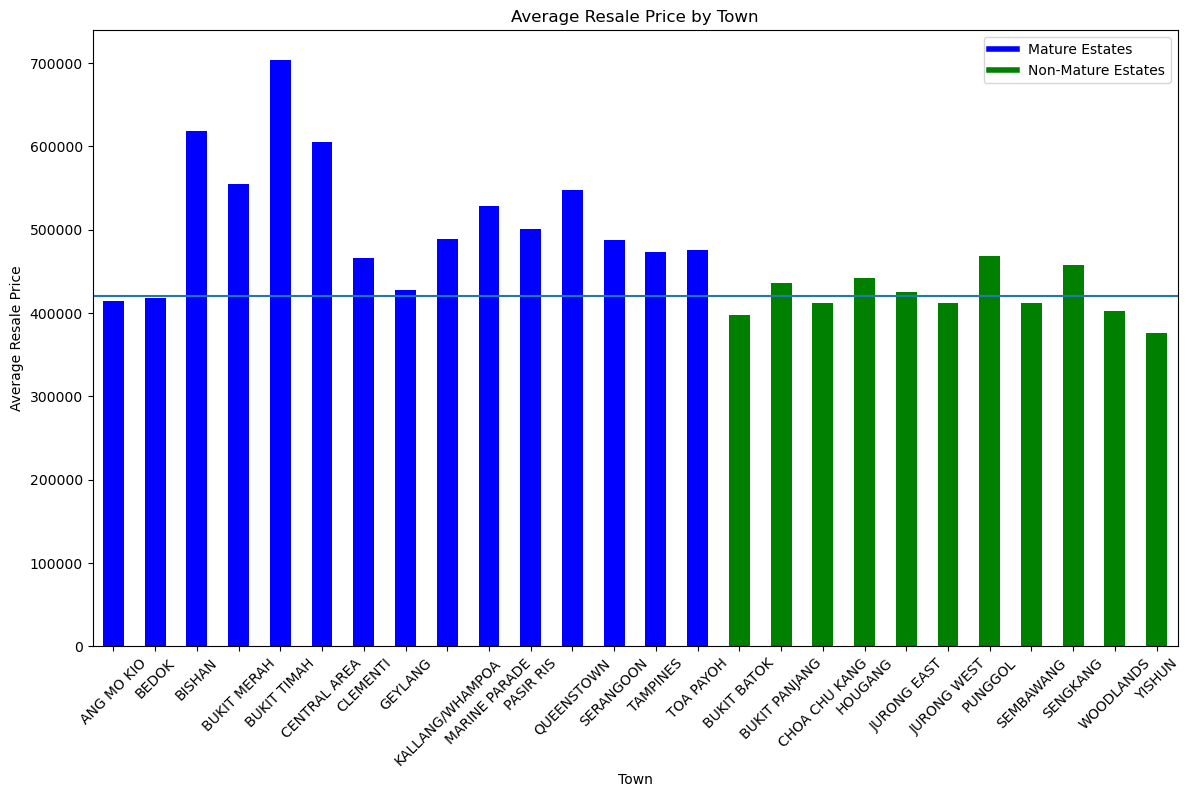

In [56]:
# Custom order of towns
custom_order = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 'TAMPINES', 'TOA PAYOH',
                'BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'PUNGGOL', 'SEMBAWANG', 'SENGKANG', 'WOODLANDS', 'YISHUN']

# Calculate the average resale price for each town
average_resale_price_by_town = hdb_fam.groupby('town')['resale_price'].mean().loc[custom_order]

# Define colors based on custom order
bar_colors = ['blue' if town in custom_order[:15] else 'green' for town in average_resale_price_by_town.index]

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_resale_price_by_town.plot(kind='bar', color=bar_colors)
plt.axhline(420000)
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price by Town')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  

# Add legend
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Mature Estates')
green_patch = plt.Line2D([0], [0], color='green', lw=4, label='Non-Mature Estates')
plt.legend(handles=[blue_patch, green_patch])

plt.show()

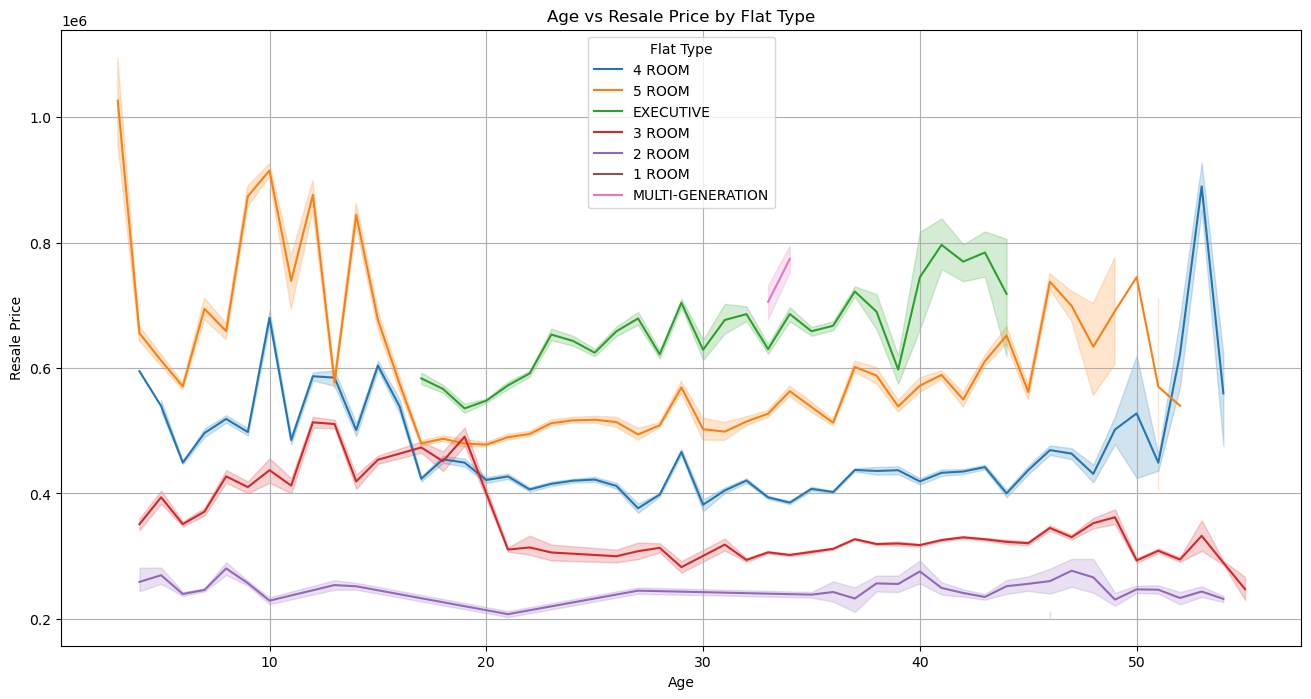

In [57]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='age', y='resale_price', hue='flat_type', data=hdb_fam)
plt.xlabel('Age')
plt.ylabel('Resale Price')
plt.title('Age vs Resale Price by Flat Type')
plt.grid(True)
plt.legend(title='Flat Type')
plt.show()

In [58]:
hdb_fam.to_csv('../datasets/hdb_fam_clean.csv', index=False)